# Data Preparation

In [172]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

# To allow multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [173]:
wba_data = pd.read_csv('wba_data_CLEAN.csv')
wba_data = wba_data.drop(["Unnamed: 0", "Subject"], axis=1)
wba_data.head()

,Gender,AgeY,PTA0.5,PTA1,PTA2,PTA4,PTAAv4FA,ECV,TPP,SC,...,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0,9.333333,20,20,20,20,20,1.08,-189.0,0.52,...,-0.405697,-2.841202,1.594642,0.724436,-0.579289,-0.553364,0.704006,-0.409157,0.072477,-0.217327
1,0,9.500000,20,20,20,20,20,1.28,-49.0,1.28,...,1.479339,1.668937,-0.048483,0.608993,0.251156,-0.710949,0.604375,-0.616950,0.637559,-0.469144
2,1,9.833333,20,20,20,20,20,1.26,-27.0,0.87,...,-0.343253,-0.215469,-0.777275,-1.703650,0.510768,-0.413348,-0.206985,-0.375959,0.339409,-0.049631
3,0,9.916667,20,20,20,20,20,0.64,-8.0,0.60,...,-0.603940,1.065511,1.333238,0.796636,0.454654,-0.116502,0.247162,0.303749,-0.243954,-0.046242
4,0,7.916667,20,20,20,20,20,0.92,-17.0,1.65,...,-0.434886,2.172756,0.895713,1.079165,1.445886,0.345314,-1.758196,0.268712,-0.148645,-0.204201


## Removing Unwanted Variables

Removing PoF variables (updated in data_cleaning.py)

In [174]:
# features = list(wba_data.columns)
# print(len(features))

# for feature in wba_data.columns:
#     # print(feature)
#     if feature == "OverallPoF":
#         continue
#     elif feature[-3:] == "PoF":
#         print("Removing {}".format(feature))
#         features.remove(feature)
#     elif feature[-4:] == 'PoFC':
#         print("Removing {}".format(feature))
#         features.remove(feature)


# print(len(features))


In [175]:
# print(features)

In [176]:
features = list(wba_data.columns)

Removing PCAs:

In [177]:

for feature in wba_data.columns:
    if feature[:2] == "PC":
        print("Removing {}".format(feature))
        features.remove(feature)

# features

Removing PC1
Removing PC2
Removing PC3
Removing PC4
Removing PC5
Removing PC6
Removing PC7
Removing PC8
Removing PC9
Removing PC10
Removing PC11
Removing PC12
Removing PC13
Removing PC14
Removing PC15


In [178]:
#   Implemented in data_cleaning.py
#  unwanted_cols = ['Unnamed: 0', 'DOB', 'DOT', 'AgeM']

# for col in unwanted_cols:
#     print("Removing {}".format(col))
#     features.remove(col)

## Converting TympType to Numerical

Commented out - updated in data_cleaning.py

In [179]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()

# ohe_tymptype = encoder.fit_transform(wba_data[['TympType']])

# print(ohe_tymptype.toarray()[1:10])

# ohe_tymptype = pd.DataFrame(ohe_tymptype)

In [180]:
# wba_data['TympType'] = ohe_tymptype

## Train Test Split

In [248]:
wba_data[wba_data.columns[:19]]

,Gender,AgeY,PTA0.5,PTA1,PTA2,PTA4,PTAAv4FA,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,OverallPoF,Ear coded,Pressure
0,0,9.333333,20,20,20,20,20,1.08,-189.0,0.52,"(0, 2)\t1.0",3.0,10.0,18.0,14.0,8.0,1,0,-1
1,0,9.500000,20,20,20,20,20,1.28,-49.0,1.28,"(0, 0)\t1.0",7.0,4.0,9.0,5.0,6.0,0,0,-4
2,1,9.833333,20,20,20,20,20,1.26,-27.0,0.87,"(0, 0)\t1.0",9.0,12.0,8.0,12.0,16.0,0,0,-4
3,0,9.916667,20,20,20,20,20,0.64,-8.0,0.60,"(0, 0)\t1.0",13.0,9.0,13.0,11.0,12.0,0,0,2
4,0,7.916667,20,20,20,20,20,0.92,-17.0,1.65,"(0, 0)\t1.0",7.0,0.0,2.0,12.0,6.0,1,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1,8.666667,20,20,20,20,20,1.18,-48.0,1.07,"(0, 0)\t1.0",10.3,18.6,12.0,0.5,3.7,0,1,1
235,0,8.666667,20,20,20,20,20,0.78,-17.0,0.77,"(0, 0)\t1.0",13.2,23.5,17.3,14.3,6.7,0,1,-4
236,1,8.833333,20,20,20,20,20,0.90,2.0,1.02,"(0, 0)\t1.0",5.3,11.0,15.3,14.6,11.5,0,1,-5
237,1,8.250000,20,20,20,20,20,0.76,-173.0,0.15,"(0, 2)\t1.0",-3.6,-0.9,-2.4,3.0,3.0,1,1,-5


Making list of all frequencies

In [181]:
freqs = [f for f in features if f[:2] == "f("]

In [182]:
y = wba_data['OverallPoF']

X = wba_data[freqs]
# X = X.loc[:, X.columns != 'OverallPoF']

# ### TEMPORARY
# X = X.loc[:, X.columns != 'TympType']
# X = X.loc[:, X.columns != 'EarSide']

# # X = X.drop(['Unnamed: 0', 'DOB', 'DOT', 'AgeM'], axis=1)
X.columns

Index(['f(226.0000)', 'f(257.3256)', 'f(280.6155)', 'f(297.3018)',
       'f(324.2099)', 'f(343.4884)', 'f(363.9133)', 'f(385.5527)',
       'f(408.4789)', 'f(432.7683)',
       ...
       'f(6168.8433)', 'f(6349.6042)', 'f(6535.6618)', 'f(6727.1713)',
       'f(6924.2925)', 'f(7127.1897)', 'f(7336.0323)', 'f(7550.9945)',
       'f(7772.2555)', 'f(8000.0000)'],
      dtype='object', length=107)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

# Feature Selection


Creating dataframe with only frequencies and label column

In [184]:
wba_data_freqsonly = wba_data[freqs+["OverallPoF"]]

## Feature Assessment Functions

Creating function to visualise which frequencies are selected for each technique

In [185]:
def assess_freqs(wba_data, freq_cols, selected, title = "Selected Frequencies"):
    """
    wba_data: Full dataset
    freq_cols: List of all frequency column names
    selected: List of selected frequencies
    """

    # Creating melted dataframe (long format) for plotting
    overall_pof_df = wba_data[['OverallPoF'] + freq_cols]
    overall_pof_df = overall_pof_df.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
    overall_pof_df = overall_pof_df.groupby('OverallPoF').mean()
    overall_pof_df = overall_pof_df.melt(ignore_index=False)
    overall_pof_df = overall_pof_df.reset_index()

    # Plotting
    ax = sns.pointplot(x='variable', y='value', hue='OverallPoF', data=overall_pof_df)

    # Adding vertical lines at selected frequencies
    position = 0
    for freq in freq_cols:
        if freq in selected:
            ax.axvline(x=position, ls='--', color='red')
        position += 1

    sns.set(rc={'figure.figsize':(20,10)})

    # Rotate x-axis labels
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

    ax.set(title = title)

    # Show only every 2 tick labels on x-axis
    # plt.setp(ax.get_xticklabels()[::2], visible=False)

    plt.tight_layout()
    plt.show();



Correlation Assessment

In [186]:
def assess_corrs(df, cols, annot=False):
    """
    Creates correlation heatmap columns `cols` in dataframe `df`
    """
    corr_matrix_pca = df[cols].corr()

    sns.set(rc={'figure.figsize':(20,15)})
    sns.heatmap(corr_matrix_pca, annot=annot)

Control variables and frequencies assessment

In [236]:
def assess_feats(features):
    """
    Takes list of selected features and separates control variables and frequencies
    """
    conts = [f for f in features if f[:2] != "f("]
    freqs = [f for f in features if f[:2] == "f("]

    print("Selected control variables:\n{}".format(conts))
    print("Selected frequencies:\n{}".format(freqs))
    return conts, freqs



Example usage:

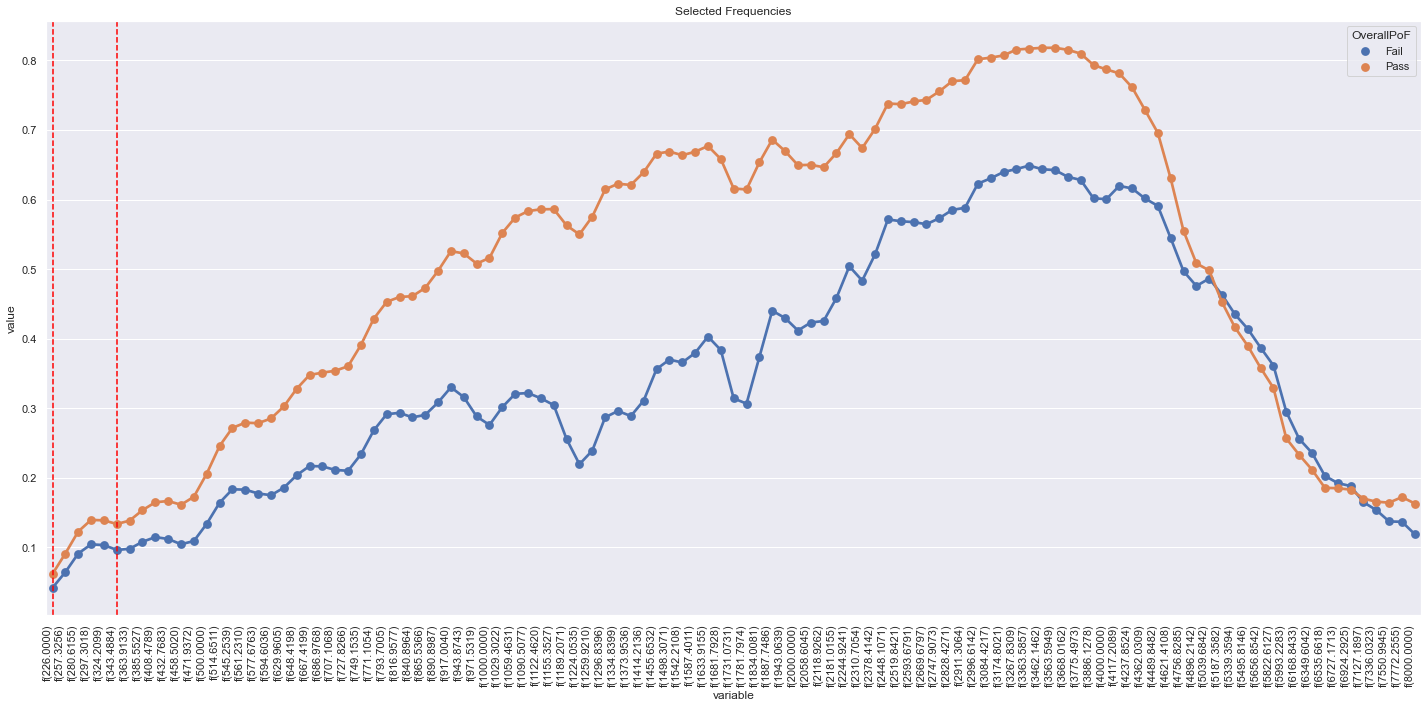

In [187]:
assess_freqs(wba_data, freqs, ['f(343.4884)', 'f(226.0000)'])

## Filter Methods

### Information gain

<AxesSubplot:>

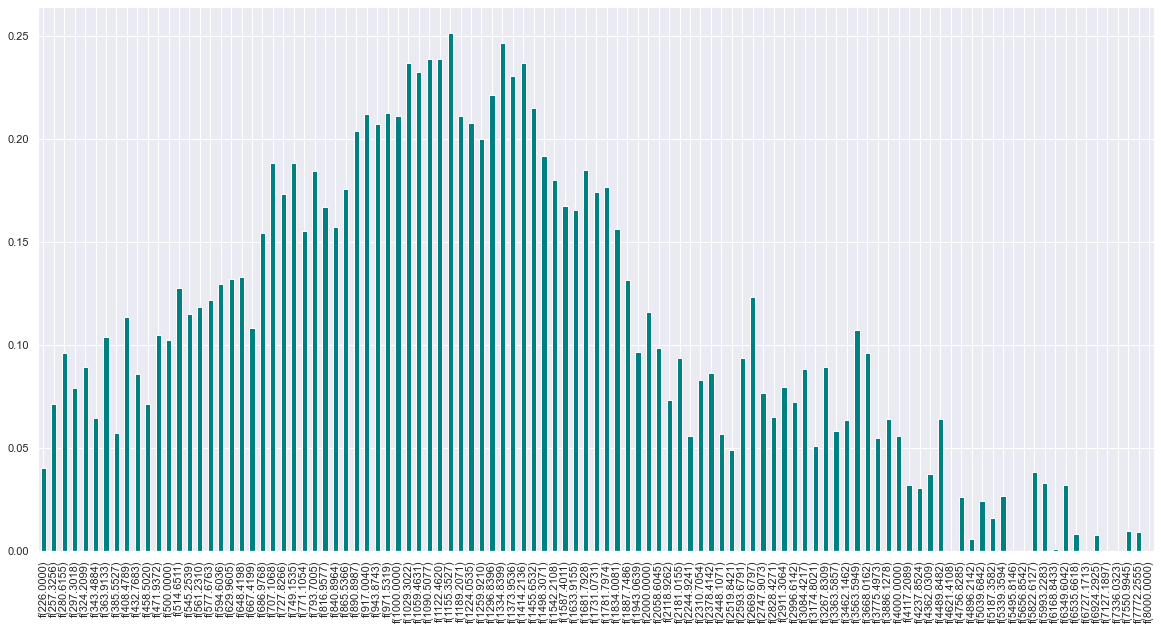

In [188]:
from sklearn.feature_selection import mutual_info_classif
from matplotlib.pyplot import figure

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, wba_data_freqsonly.columns[0:len(wba_data_freqsonly.columns)-1])
feat_importances.plot(kind='bar', color='teal')
plt.rcParams["figure.figsize"] = (40,10)
plt.show()


## Correlation Coefficient

In [189]:
cor = wba_data_freqsonly.corr()

corr_threshold = 0.5

# Correlation with predicted variable (deep copy as we will be editing `cor`)
cor_pred = cor['OverallPoF'].copy(deep=True)

abs(cor_pred) > 0.5

f(226.0000)     False
f(257.3256)     False
f(280.6155)     False
f(297.3018)     False
f(324.2099)     False
                ...  
f(7336.0323)    False
f(7550.9945)    False
f(7772.2555)    False
f(8000.0000)    False
OverallPoF       True
Name: OverallPoF, Length: 108, dtype: bool

### Variance Threshold

In [190]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0.03)
v_threshold.fit(X)
v_threshold.get_support()

VarianceThreshold(threshold=0.03)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False])

## Wrapper Methods

Methods that seach all possible feature subsets and assess their quality

### Forward Feature Selection

In [191]:
# !pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight = "balanced",
    solver = "lbfgs",
    random_state=42,
    n_jobs = -1
)

ffs = SequentialFeatureSelector(lr, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(X, y)

In [232]:
features_ffs = list(ffs.k_feature_names_)
freqs_ffs = [f for f in features_ffs if f[0:2] == "f("]

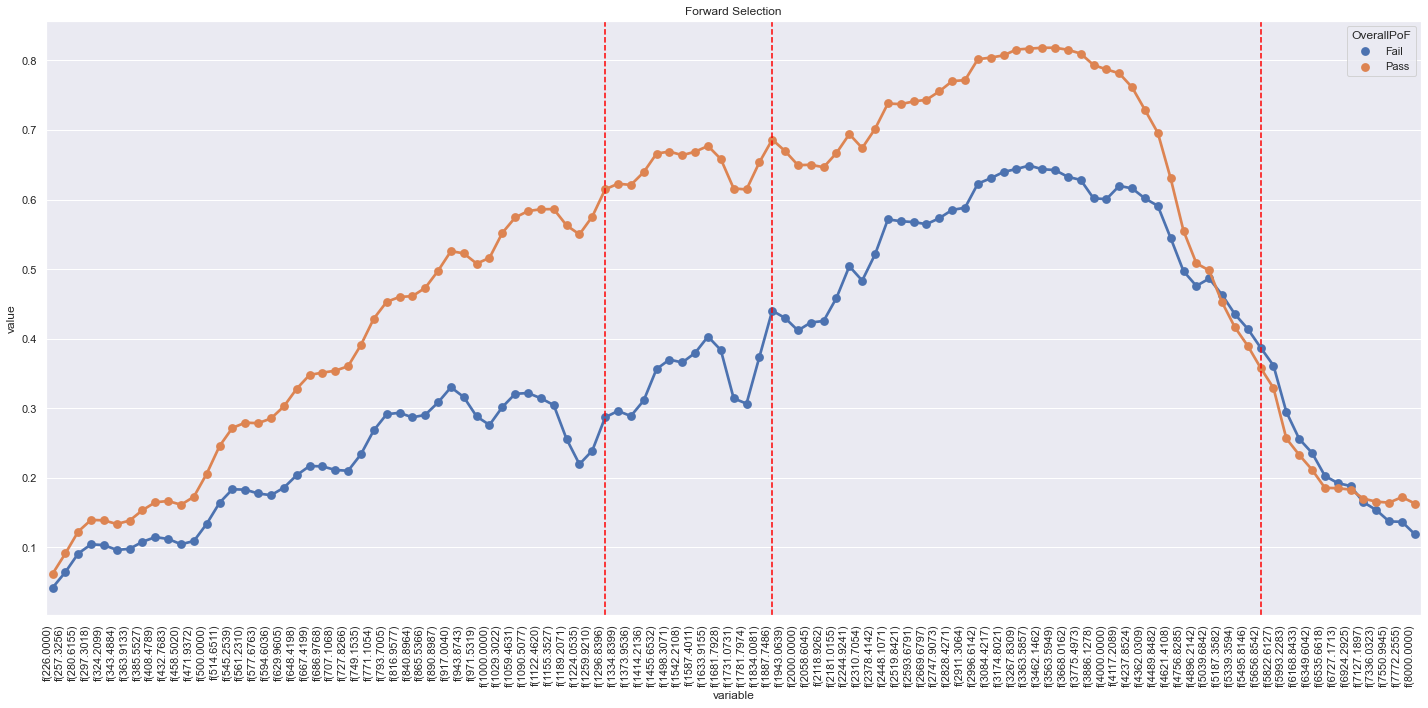

In [227]:
assess_freqs(wba_data, freqs, features_ffs, title="Forward Selection")

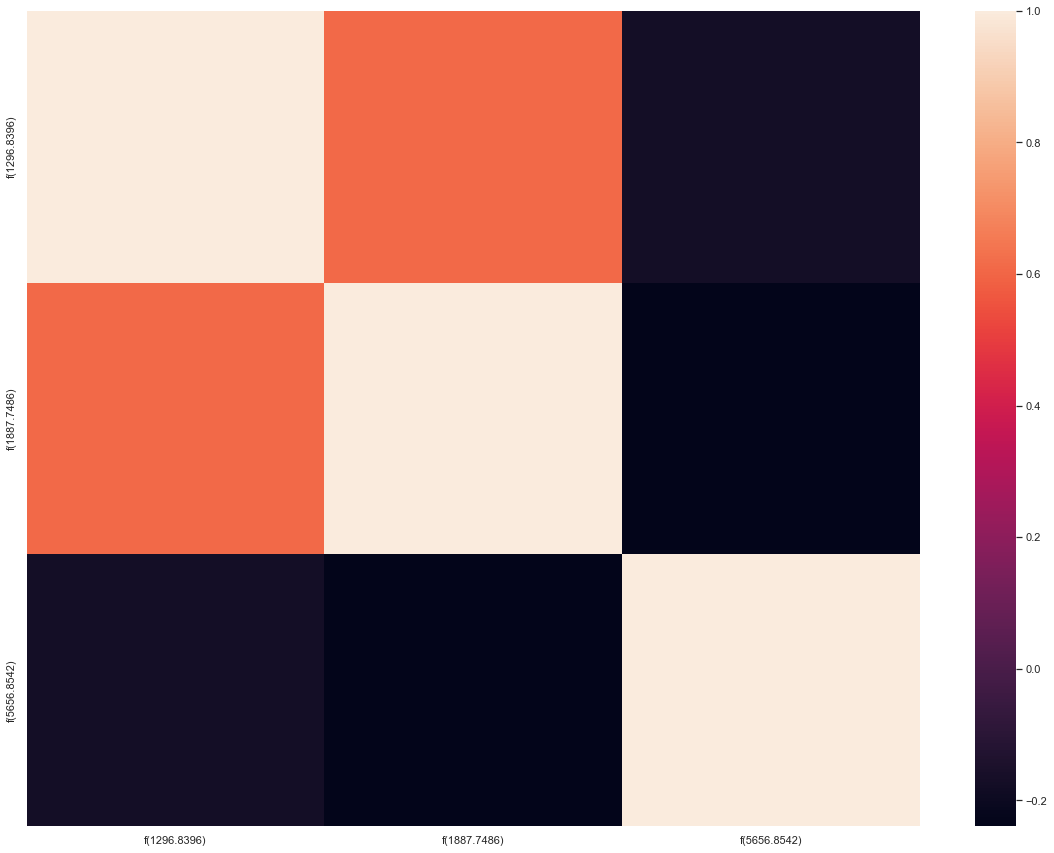

In [228]:
assess_corrs(wba_data, features_ffs)

### Backward Feature Elimination

In [ ]:
bfs = SequentialFeatureSelector(lr, k_features = 'best', forward = False, n_jobs = -1)
bfs.fit(X, y)

In [234]:
features_bfs = list(bfs.k_feature_names_)
freqs_bfs = [f for f in features_bfs if f[:2] == "f("]

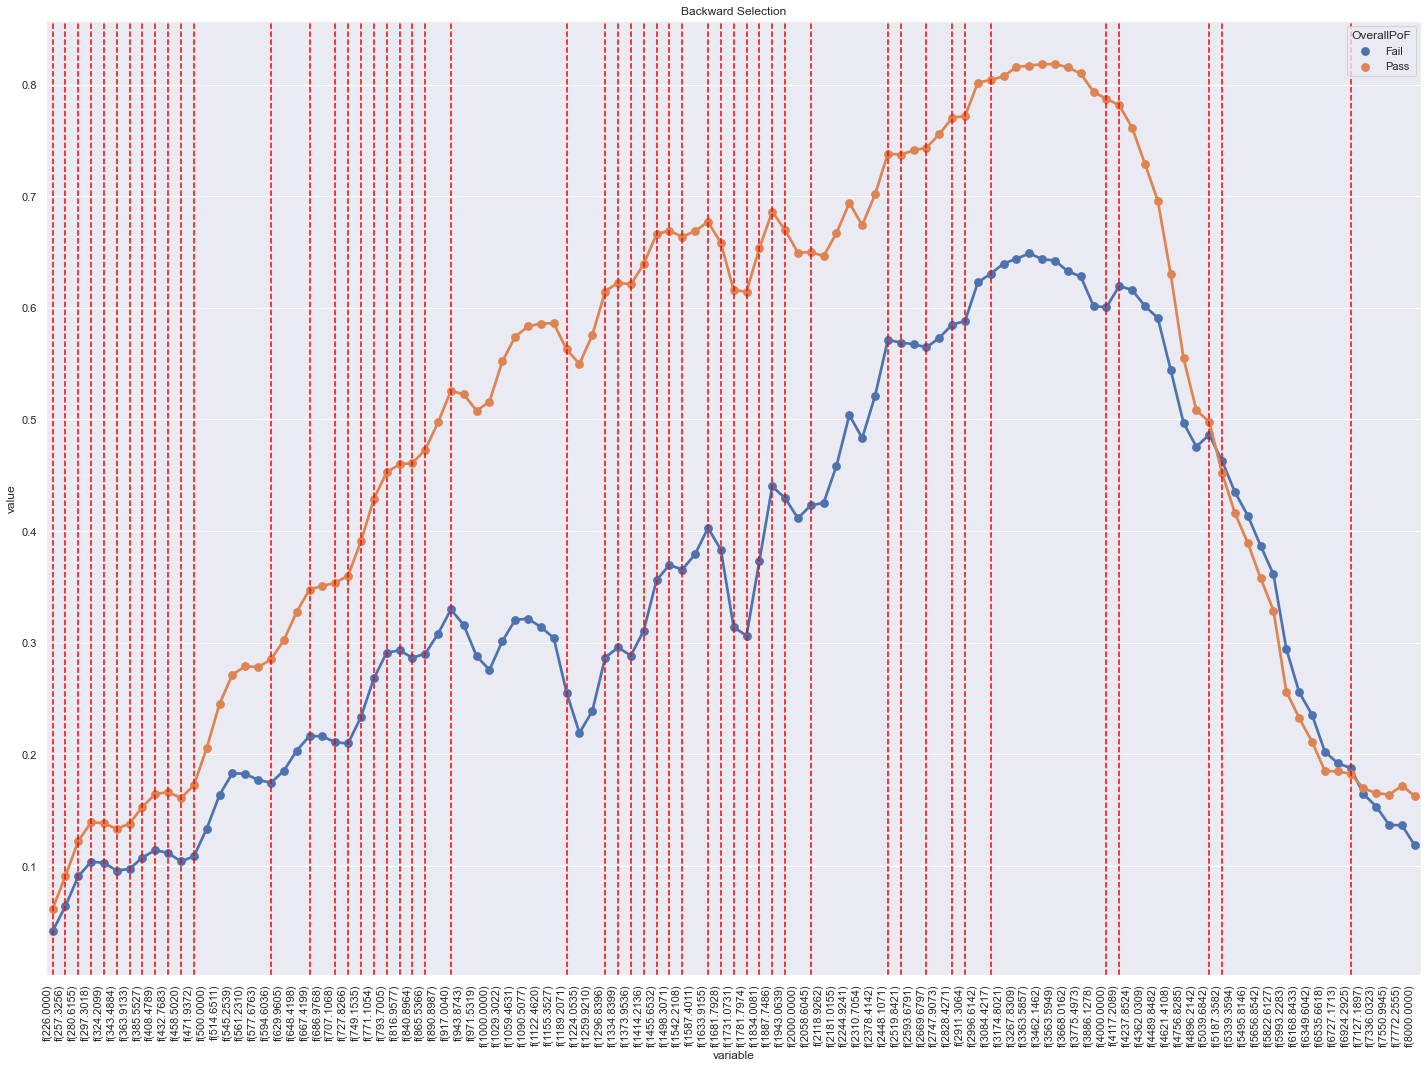

In [198]:
assess_freqs(wba_data, freqs, features_bfs, title="Backward Selection")

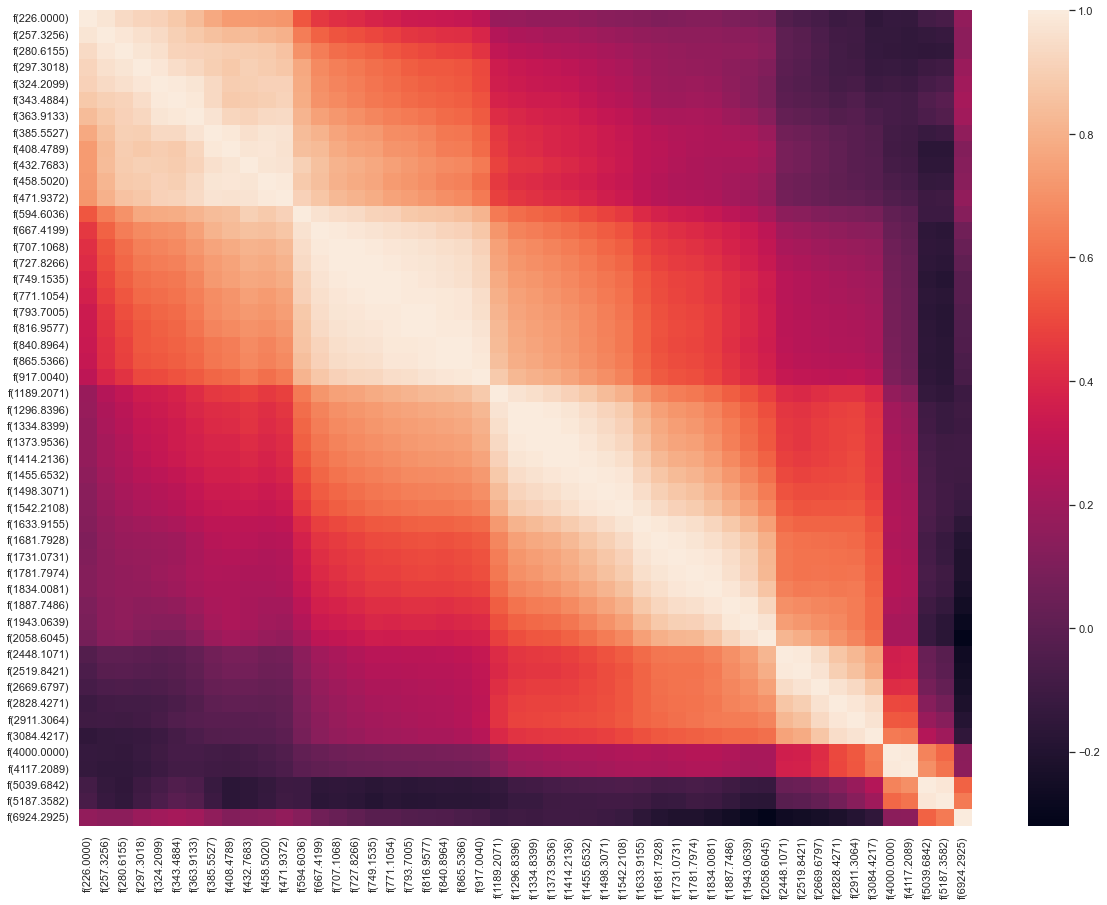

In [199]:
assess_corrs(wba_data, features_bfs)

### Exhaustive Selection

Brute-force method: Tries every possible combination of variables and returns the best-performing subset. (LONG RUNTIME)

In [ ]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector

# # Algorithm to test features on
# efs = ExhaustiveFeatureSelector(lr,
#     min_features = 6,
#     max_features = 24,
#     scoring = 'roc_auc',
#     cv=2
#     )

# # Fit object to data
# efs = efs.fit(X, y)

# # Print selected features
# features_efs = X.columns[list(efs.best_idx_)]
# print(features_efs)

In [239]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
features_rfe = X.loc[:,rfe_support].columns.tolist()
print(str(len(features_rfe)), 'selected features')

Fitting estimator with 107 features.
Fitting estimator with 97 features.
Fitting estimator with 87 features.
Fitting estimator with 77 features.
Fitting estimator with 67 features.
Fitting estimator with 57 features.
Fitting estimator with 47 features.
Fitting estimator with 37 features.
Fitting estimator with 27 features.
Fitting estimator with 17 features.


RFE(estimator=LogisticRegression(), n_features_to_select=15, step=10, verbose=5)

15 selected features


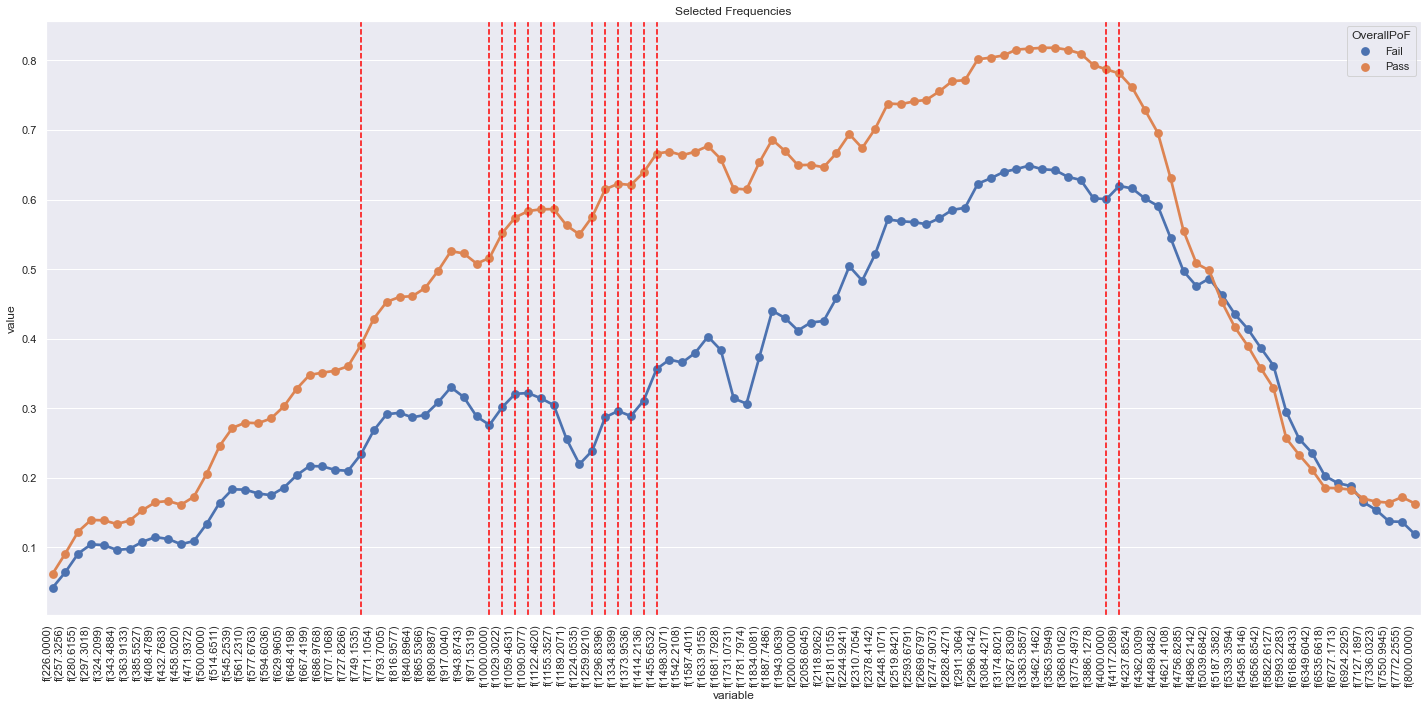

In [244]:
assess_freqs(wba_data, freqs, features_rfe)

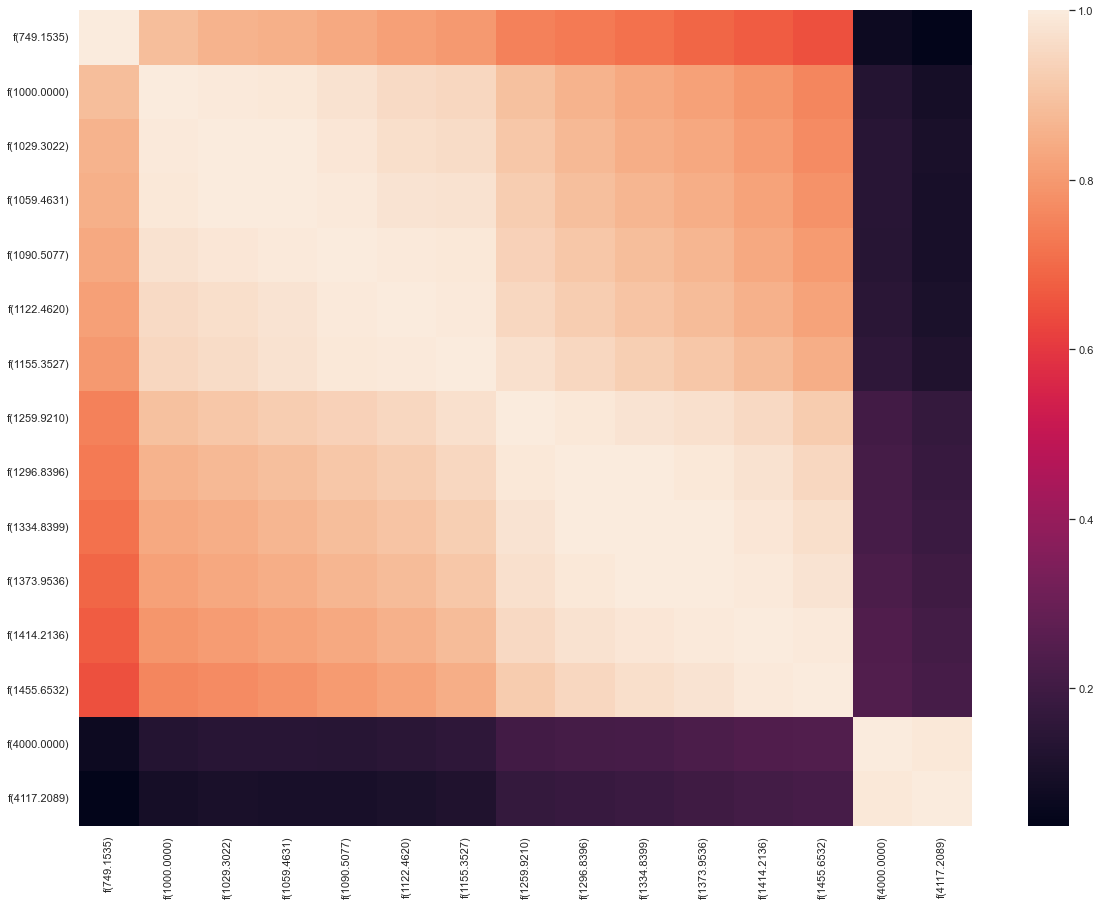

In [242]:
assess_corrs(wba_data, features_rfe)

### Recursive Feature Elimination

## Random Forest

In [223]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=420),max_features=55)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
features_rf = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(features_rf)), 'selected features')

SelectFromModel(estimator=RandomForestClassifier(n_estimators=420),
                max_features=55)

24 selected features


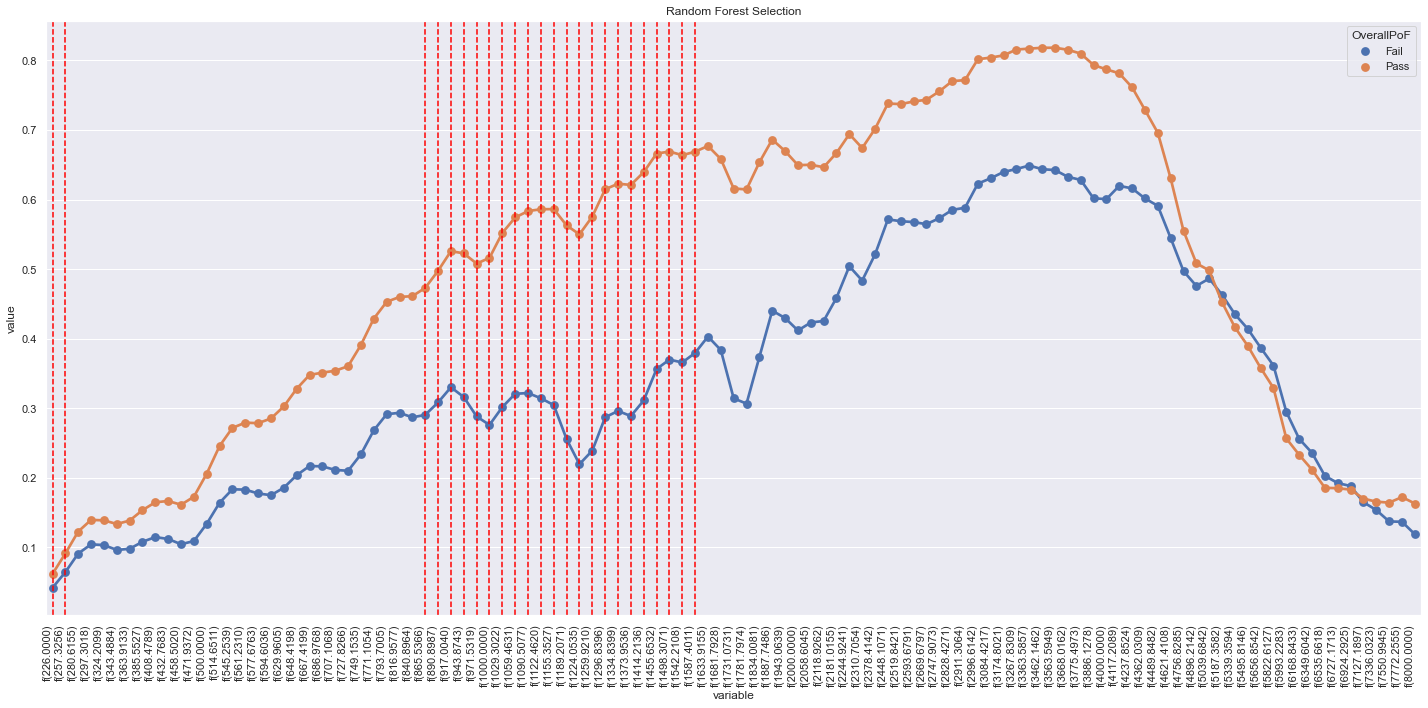

In [224]:
assess_freqs(wba_data, freqs, features_rf, title="Random Forest Selection")